In [14]:
#import necessary libraries
import tensorflow as tf
import tensorflow_hub as tf_hub
import matplotlib.pyplot as pt


import numpy as np
import PIL as pl
from PIL import ImageDraw
from PIL import ImageFont


In [44]:
# To display the image
def displayImage(img):
    img_ = pt.figure(figsize=(15,10))
    pt.imshow(img)

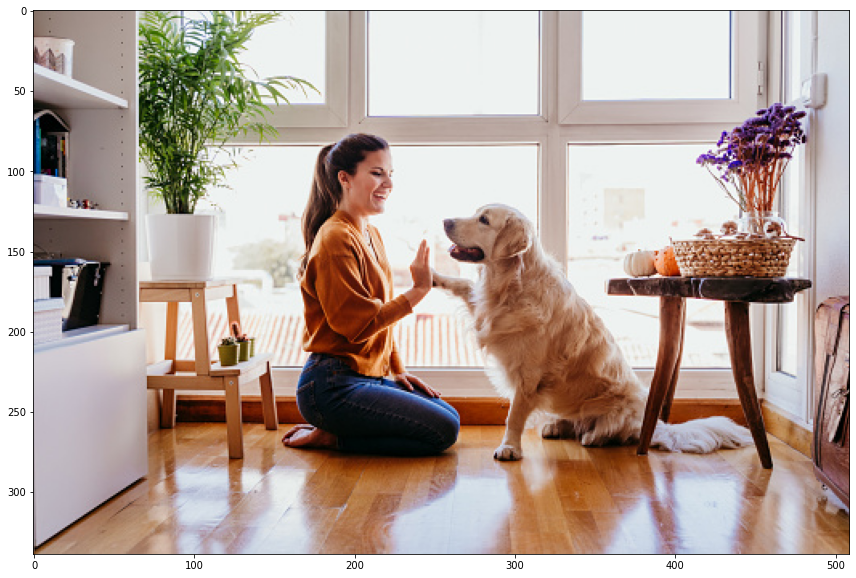

In [62]:
#Get Image
my_img = pl.Image.open("Images/image2.jpg")
displayImage(my_img)

In [4]:
# Now load the model from tensorflow_hub
model_path = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
inference_model = tf_hub.load(model_path).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
converted_img = tf.image.convert_image_dtype(my_img,tf.float32)[tf.newaxis, ...]

In [6]:
result = inference_model(converted_img)

In [7]:
for i in result.keys():
    print(i)
result

detection_class_names
detection_scores
detection_boxes
detection_class_entities
detection_class_labels


{'detection_class_names': <tf.Tensor: shape=(100,), dtype=string, numpy=
 array([b'/m/0bt9lr', b'/m/03bt1vf', b'/m/03jm5', b'/m/04bcr3',
        b'/m/09j5n', b'/m/04bcr3', b'/m/09j2d', b'/m/0fly7', b'/m/0gjbg72',
        b'/m/0dzct', b'/m/0c_jw', b'/m/0dzf4', b'/m/05s2s', b'/m/0c_jw',
        b'/m/01mzpv', b'/m/0c_jw', b'/m/05r655', b'/m/05s2s', b'/m/04bcr3',
        b'/m/0fm3zh', b'/m/0c9ph5', b'/m/01s105', b'/m/09j2d',
        b'/m/0gjbg72', b'/m/03q69', b'/m/09j2d', b'/m/035r7c', b'/m/0cgh4',
        b'/m/03jm5', b'/m/0c_jw', b'/m/03fp41', b'/m/01g317', b'/m/07j7r',
        b'/m/0c_jw', b'/m/03fp41', b'/m/0642b4', b'/m/0gjbg72',
        b'/m/0gjbg72', b'/m/0d4v4', b'/m/0c_jw', b'/m/0c_jw', b'/m/0dzf4',
        b'/m/0d4v4', b'/m/078n6m', b'/m/0dzf4', b'/m/01mzpv', b'/m/07kng9',
        b'/m/03jm5', b'/m/0c_jw', b'/m/0gjbg72', b'/m/01s105',
        b'/m/01s105', b'/m/01s105', b'/m/01yrx', b'/m/03jm5', b'/m/01g317',
        b'/m/0gjbg72', b'/m/04bcr3', b'/m/04bcr3', b'/m/02p0tk3',
    

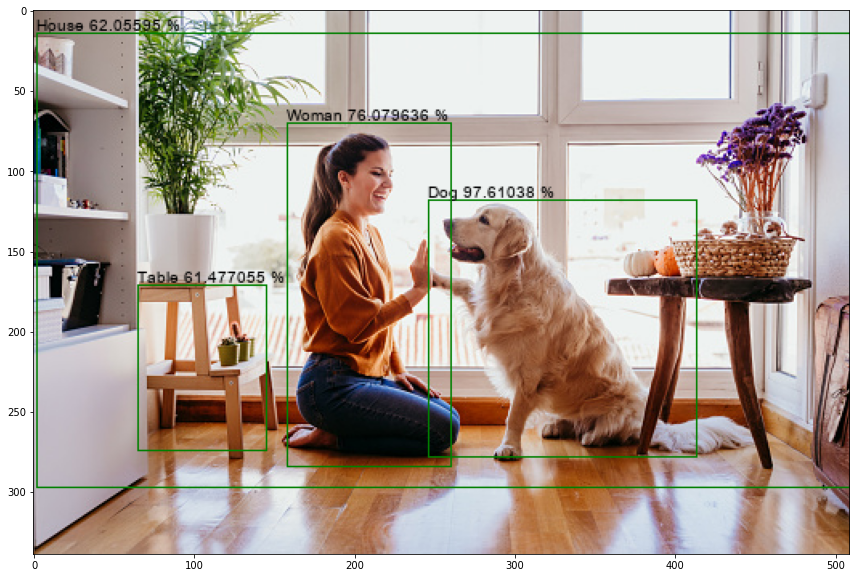

In [63]:
img_rect = ImageDraw.Draw(my_img)
for i,j,entity in zip(result['detection_boxes'],result['detection_scores'],result['detection_class_entities']):
    imW,imH = my_img.size
    (top,left,bottom,right) =(i[0]*imH,i[1]*imW,i[2]*imH,i[3]*imW) 
  
    if (j*100)>60:
        img_font = ImageFont.truetype(r'fonts\Ayar\ayar.ttf',10)
        img_rect.line([(left, top), (left, bottom), (right, bottom), (right, top),(left, top)],fill="green",width=0)
        text_height = 12;
        text = np.array(entity)
        text_str = str(text)
        text_str = text_str[2:]
        text_str = text_str[:(len(text_str)-1)]
        pos = np.array(j)
        pos*=100
        text_str = text_str + " " +str(pos)+" %"
        img_rect.text((left,top - text_height),text_str,fill='black',font = img_font)
       
        
        
        
displayImage(my_img)  